In [8]:
#Importing the required libraries

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
sns.set()

In [9]:
#Praw is a Reddit Api Wrapper

import praw

In [20]:
#Connecting to the Reddit Api

reddit=praw.Reddit(client_id="-lP_ca1voJ30SA",client_secret='Sr9qgiRA8iER4G53SzyCy9aMgcQ',user_agent='vipul115')

In [21]:
#Initializing headlines,ups and downs as empty lists

Headlines=[]
Ups=[]
Downs=[]

d={'Headlines':Headlines,
        'Ups':Ups,
        'Downs':Downs
       }



In [23]:
#Input from the user

searchTerm=input('Enter the subreddit you want to search  ')
noofsearchTerm=int(input('Enter the no of headlines you want to search '))

Enter the subreddit you want to search  politics
Enter the no of headlines you want to search 1000


In [24]:
# .new(limit=noofsearchTerm) Finds the latest  headlines

for submission in reddit.subreddit(searchTerm).new(limit=noofsearchTerm/2):
    Headlines.append(submission.title)
    Ups.append(submission.ups)
    Downs.append(submission.downs)
    


In [25]:
# .hot(limit=noofsearchTerm) returns the most popular headlines

for submission in reddit.subreddit(searchTerm).hot(limit=noofsearchTerm/2):
    Headlines.append(submission.title)
    Ups.append(submission.ups)
    Downs.append(submission.downs)
    
    

            

In [26]:
df=pd.DataFrame(d)

In [27]:
df.sort_values(by='Ups',inplace=True,ascending=False)
df.head(20)

,Headlines,Ups,Downs
248,"For the first time, Trump confesses that his c...",56849,0
518,"For the first time, Trump confesses that his c...",56841,0
757,Ivanka Trump Comes Out Against Family Separati...,42842,0
505,The Day Trump Told Us There Was Attempted Coll...,37906,0
159,The Day Trump Told Us There Was Attempted Coll...,37901,0
927,Report: Trump commission did not find widespre...,35806,0
526,Trump's Supreme Court nominee argued president...,34779,0
283,Trump's Supreme Court nominee argued president...,34778,0
999,President Trump admits he’s trying to kill Oba...,30559,0
663,"NRA Says it Is Facing a Financial Crisis, Twit...",28855,0


In [28]:
df['Sentiments']=0
noofTerms=df.shape[0]
df.shape

(1000, 4)

In [29]:
from textblob import TextBlob


positive=0
negative=0
neutral=0
polarity=0

def percentage(part,whole):
    return 100*float(part)/float(whole)


for i,headline in enumerate(df['Headlines']):
    analysis=TextBlob(headline)
    polarity+=analysis.sentiment.polarity
    if(analysis.sentiment.polarity==0.0):
        neutral+=1
    elif(analysis.sentiment.polarity>0.00):
        positive+=1
    elif(analysis.sentiment.polarity<0.00):
        negative+=1

    if(analysis.sentiment.polarity==0.0):
        df['Sentiments'][i]=1
    elif(analysis.sentiment.polarity>0.0):
        df['Sentiments'][i]=2
    elif(analysis.sentiment.polarity<0.0):
        df['Sentiments'][i]=0
        
        
#Calculating the percentage of all the positive,negative and neutral terms

positive=percentage(positive,noofTerms)
negative=percentage(negative,noofTerms)
neutral=percentage(neutral,noofTerms)


positive=format(positive, '.2f')
negative=format(negative, '.2f')
neutral=format(neutral, '.2f')


if (polarity==0):
    print("Overall Polarity is Neutral")
elif (polarity>0):
    print("Overall Polarity is Positive")
elif (polarity<0):
    print("Overall Polarity is Negative")


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Overall Polarity is Positive


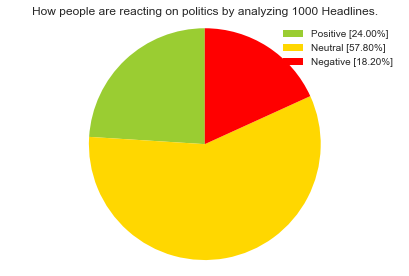

In [30]:
#Visualization

labels=['Positive [' +str(positive)+'%]', 'Neutral [' +str(neutral)+'%]', 'Negative [' +str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ searchTerm +" by analyzing "+ str(noofsearchTerm)+" Headlines.")
plt.axis("equal")
plt.tight_layout()
plt.show();